<a href="https://colab.research.google.com/github/Harshitmaury123/Machine_Learning_Lab/blob/main/ML_LAB_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
df_original=pd.read_csv('Housing.csv')
df_original.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


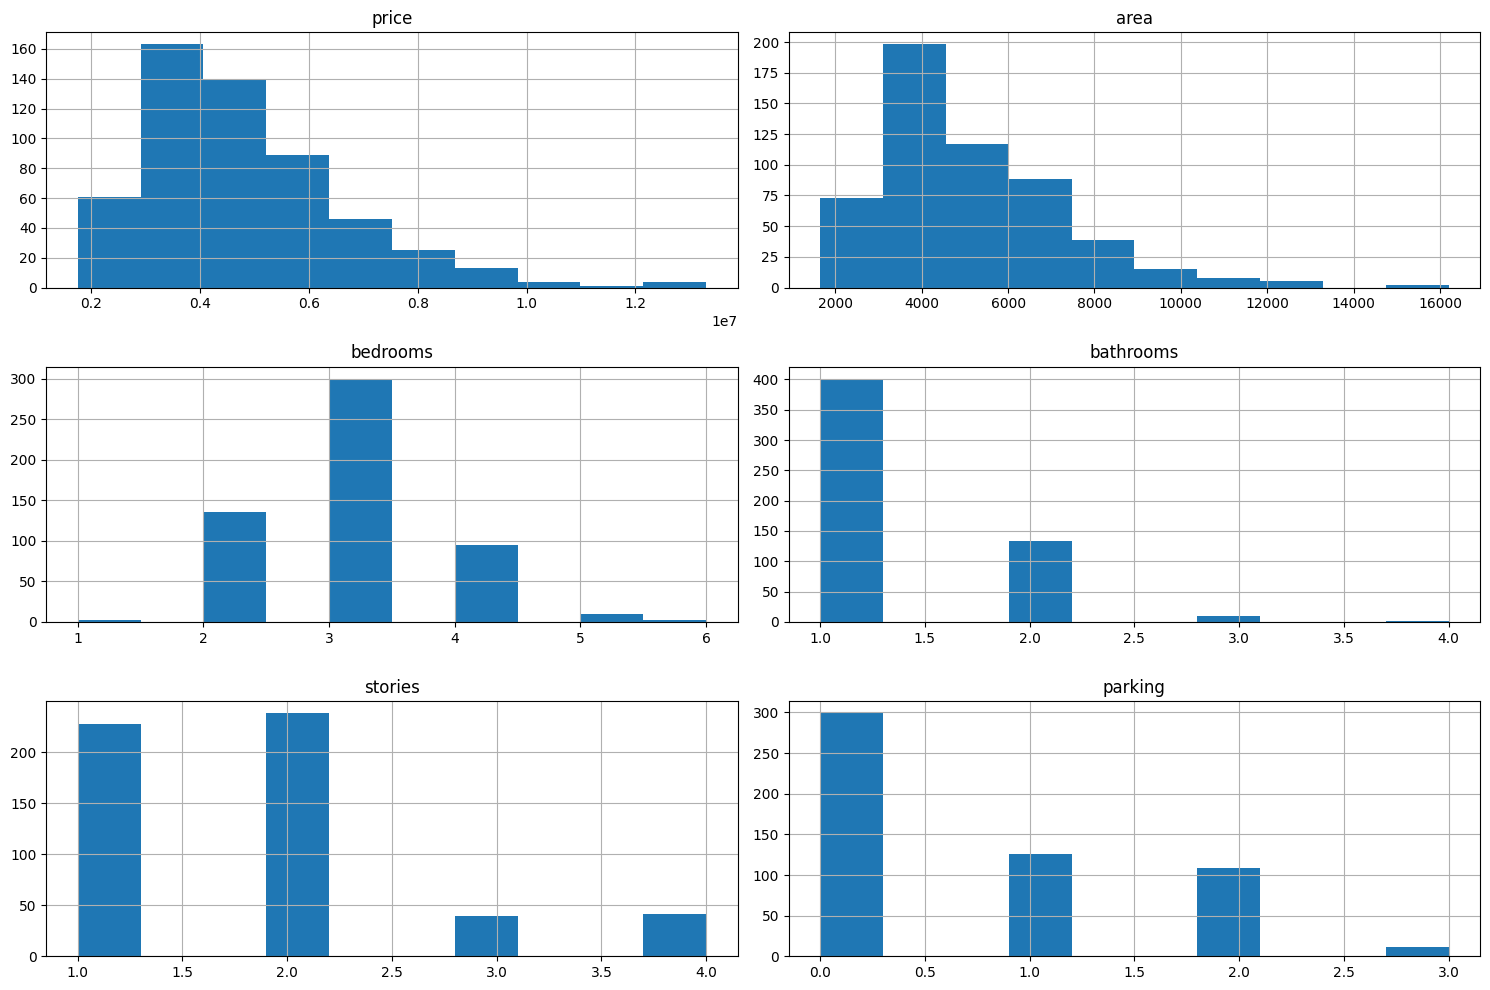

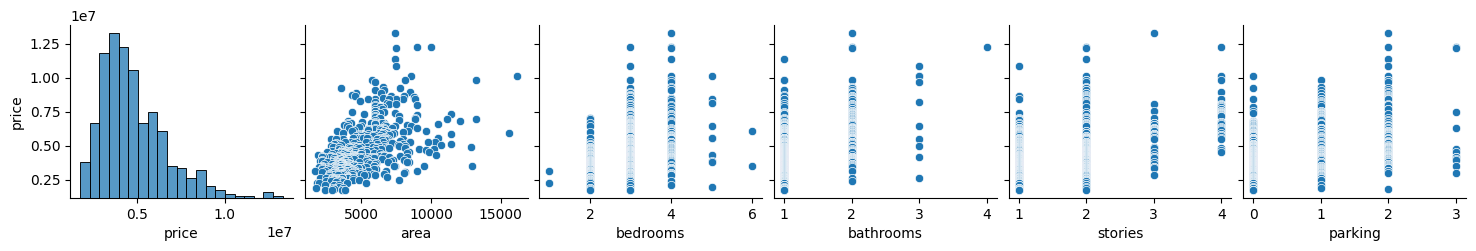

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
df_original.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualize the relationship between price and other features
sns.pairplot(df_original, y_vars=['price'])
plt.show()

In [61]:
df_original.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [62]:
import math

def calculate_mean(dataframe, column_name):
  data = dataframe[column_name]
  return sum(data) / len(data)

def calculate_median(dataframe, column_name):
  data = sorted(dataframe[column_name])
  n = len(data)
  mid_index = n // 2
  if n % 2 == 0:
    return (data[mid_index - 1] + data[mid_index]) / 2
  else:
    return data[mid_index]

def calculate_mode(dataframe, column_name):
  data = dataframe[column_name]
  frequency = {}
  for item in data:
    frequency[item] = frequency.get(item, 0) + 1
  max_frequency = max(frequency.values())
  mode = [item for item, freq in frequency.items() if freq == max_frequency]
  return mode

def calculate_std_dev(dataframe, column_name):
  data = dataframe[column_name]
  n = len(data)
  mean = sum(data) / n
  variance = sum([(x - mean) ** 2 for x in data]) / (n - 1)
  return math.sqrt(variance)


In [63]:
def min_max_scaling(dataframe, column_name):
  data = dataframe[column_name]
  min_val = min(data)
  max_val = max(data)
  dataframe[column_name]=(dataframe[column_name]-min_val)/(max_val-min_val)
  return  dataframe[column_name]

In [64]:
def standard_scaling(dataframe, column_name):
  data = dataframe[column_name]
  mean = calculate_mean(dataframe, column_name)
  std_dev = calculate_std_dev(dataframe, column_name)
  dataframe[column_name] = (dataframe[column_name] - mean) / std_dev
  return dataframe[column_name]

In [65]:
df2=df_original.copy()
df2['price']=min_max_scaling(df2,'price')
df2['area']=min_max_scaling(df2,'area')

df2['mainroad']=df2['mainroad'].map({'yes':1,'no':0})
df2['guestroom']=df2['guestroom'].map({'yes':1,'no':0})
df2['basement']=df2['basement'].map({'yes':1,'no':0})
df2['hotwaterheating']=df2['hotwaterheating'].map({'yes':1,'no':0})
df2['airconditioning']=df2['airconditioning'].map({'yes':1,'no':0})
df2['prefarea']=df2['prefarea'].map({'yes':1,'no':0})

df2['furnishingstatus']=df2['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

In [66]:
def remove_outliers_z_score(dataframe, columns, threshold=3):
    """Removes outliers from a dataframe based on the Z-score of specified columns."""
    df_out = dataframe.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_out[col]):
            z_scores = np.abs((df_out[col] - df_out[col].mean()) / df_out[col].std())
            df_out = df_out[z_scores < threshold]
    return df_out

In [67]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,1
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,1
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,2
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,1
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,1


In [68]:
df3=df_original.copy()
df3['price']=standard_scaling(df3,'price')
df3['area']=standard_scaling(df3,'area')
df3['mainroad']=df3['mainroad'].map({'yes':1,'no':0})
df3['guestroom']=df3['guestroom'].map({'yes':1,'no':0})
df3['basement']=df3['basement'].map({'yes':1,'no':0})
df3['hotwaterheating']=df3['hotwaterheating'].map({'yes':1,'no':0})
df3['airconditioning']=df3['airconditioning'].map({'yes':1,'no':0})
df3['prefarea']=df3['prefarea'].map({'yes':1,'no':0})
df3['furnishingstatus']=df3['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

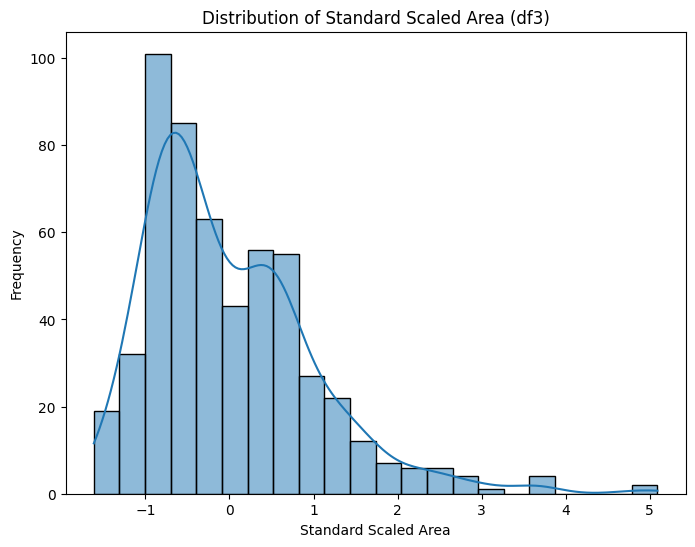

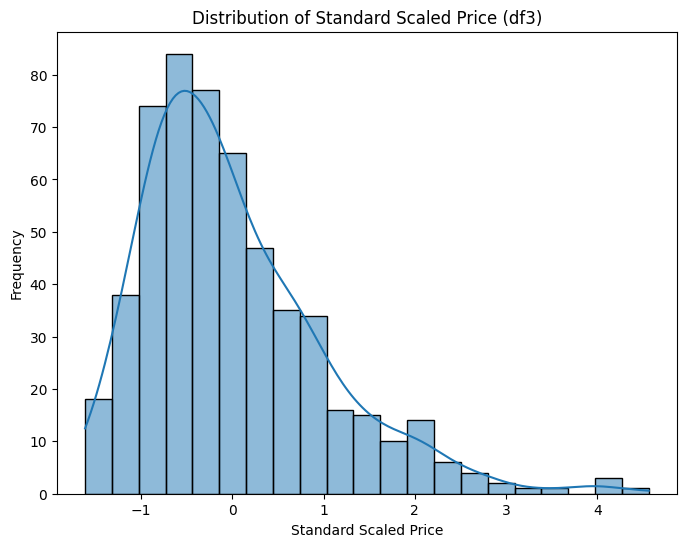

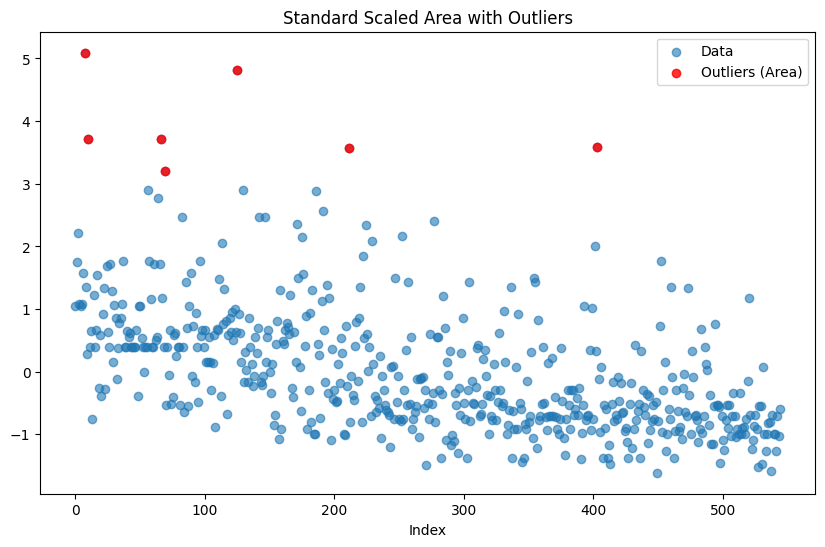

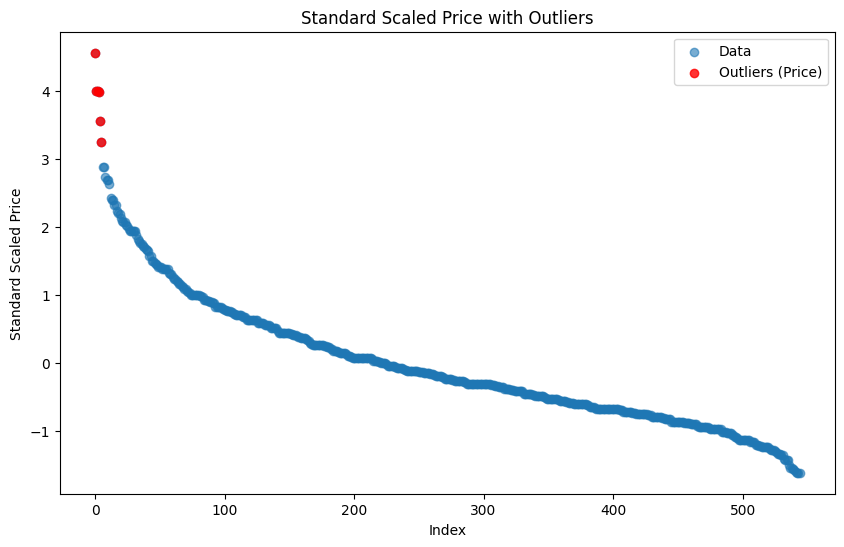

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot normal distribution for standard scaled 'area' in df3
plt.figure(figsize=(8, 6))
sns.histplot(df3['area'], kde=True)
plt.title('Distribution of Standard Scaled Area (df3)')
plt.xlabel('Standard Scaled Area')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df3['price'], kde=True)
plt.title('Distribution of Standard Scaled Price (df3)')
plt.xlabel('Standard Scaled Price')
plt.ylabel('Frequency')
plt.show()

# Identify outliers using Z-score
z_scores_area = np.abs((df3['area'] - df3['area'].mean()) / df3['area'].std())
z_scores_price = np.abs((df3['price'] - df3['price'].mean()) / df3['price'].std())

outliers_area_index = df3[z_scores_area > 3].index
outliers_price_index = df3[z_scores_price > 3].index

plt.figure(figsize=(10, 6))
plt.scatter(df3.index, df3['area'], label='Data', alpha=0.6)
plt.scatter(outliers_area_index, df3.loc[outliers_area_index, 'area'], color='red', label='Outliers (Area)', alpha=0.8)
plt.title('Standard Scaled Area with Outliers')
plt.xlabel('Index')
plt.legend()
plt.show()

# Plot 'price' vs index with outliers marked
plt.figure(figsize=(10, 6))
plt.scatter(df3.index, df3['price'], label='Data', alpha=0.6)
plt.scatter(outliers_price_index, df3.loc[outliers_price_index, 'price'], color='red', label='Outliers (Price)', alpha=0.8)
plt.title('Standard Scaled Price with Outliers')
plt.xlabel('Index')
plt.ylabel('Standard Scaled Price')
plt.legend()
plt.show()

In [70]:
df3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.562174,1.045766,4,2,3,1,0,0,0,1,2,1,1
1,4.000809,1.755397,4,4,4,1,0,0,0,1,3,0,1
2,4.000809,2.216196,3,2,2,1,0,1,0,0,2,1,2
3,3.982096,1.082630,4,2,2,1,0,1,0,1,3,1,1
4,3.551716,1.045766,4,1,2,1,1,1,0,1,2,0,1


In [71]:
df4=df_original.copy()
df4['price']=standard_scaling(df4,'price')
df4['area']=standard_scaling(df4,'area')
df4['mainroad']=df4['mainroad'].map({'yes':1,'no':0})
df4['guestroom']=df4['guestroom'].map({'yes':1,'no':0})
df4['basement']=df4['basement'].map({'yes':1,'no':0})
df4['hotwaterheating']=df4['hotwaterheating'].map({'yes':1,'no':0})
df4['airconditioning']=df4['airconditioning'].map({'yes':1,'no':0})
df4['prefarea']=df4['prefarea'].map({'yes':1,'no':0})
df4['furnished']=df4['furnishingstatus'].map({'furnished':1,'semi-furnished':0,'unfurnished':0})
df4['unfurnished']=df4['furnishingstatus'].map({'furnished':0,'semi-furnished':0,'unfurnished':1})
df4['semi-furnished']=df4['furnishingstatus'].map({'furnished':0,'semi-furnished':1,'unfurnished':0})

In [72]:
df4.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,unfurnished,semi-furnished
0,4.562174,1.045766,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,4.000809,1.755397,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,4.000809,2.216196,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,0,1
3,3.982096,1.082630,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,3.551716,1.045766,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [73]:
df5=df_original.copy()
df5['price']=min_max_scaling(df5,'price')
df5['area']=min_max_scaling(df5,'area')
df5['mainroad']=df5['mainroad'].map({'yes':1,'no':0})
df5['guestroom']=df5['guestroom'].map({'yes':1,'no':0})
df5['basement']=df5['basement'].map({'yes':1,'no':0})
df5['hotwaterheating']=df5['hotwaterheating'].map({'yes':1,'no':0})
df5['airconditioning']=df5['airconditioning'].map({'yes':1,'no':0})
df5['prefarea']=df5['prefarea'].map({'yes':1,'no':0})
df5['furnished']=df5['furnishingstatus'].map({'furnished':1,'semi-furnished':0,'unfurnished':0})
df5['unfurnished']=df5['furnishingstatus'].map({'furnished':0,'semi-furnished':0,'unfurnished':1})
df5['semi-furnished']=df5['furnishingstatus'].map({'furnished':0,'semi-furnished':1,'unfurnished':0})

In [74]:
df5.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,unfurnished,semi-furnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,0,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [75]:
# Combine the indices of outliers from both 'area' and 'price'
all_outliers_index = outliers_area_index.union(outliers_price_index)

# Remove the outlier rows from df3 and create a new DataFrame
df3_cleaned = df3.drop(all_outliers_index)

print(f"Original DataFrame shape: {df3.shape}")
print(f"DataFrame shape after removing outliers: {df3_cleaned.shape}")

display(df3_cleaned.head())

Original DataFrame shape: (545, 13)
DataFrame shape after removing outliers: (532, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,2.878078,1.580293,4,3,4,1,0,0,0,1,2,1,2
8,2.728380,1.359109,4,1,2,1,1,1,0,1,2,1,1
9,2.690956,0.276230,3,2,4,1,1,0,0,1,1,1,3
11,2.627335,0.391430,4,3,2,1,1,1,1,0,2,0,2
12,2.428986,0.644870,4,2,2,1,0,0,0,1,1,1,2


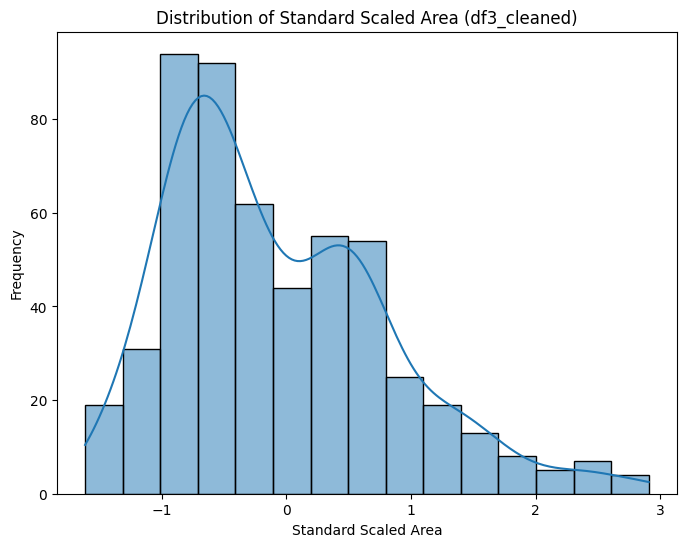

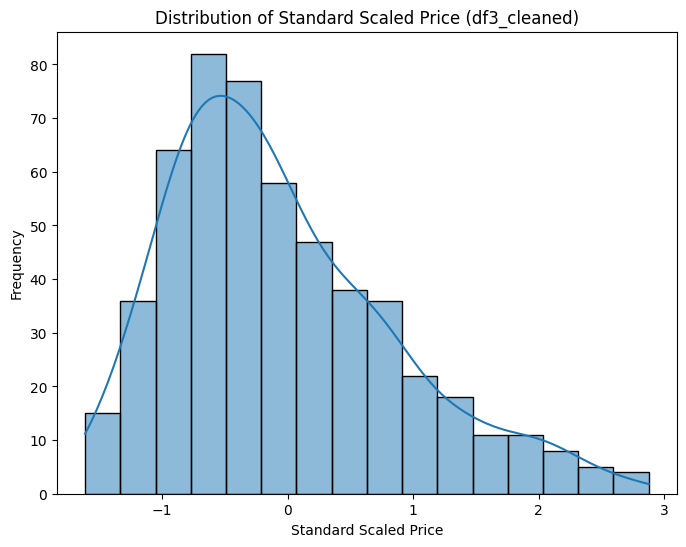

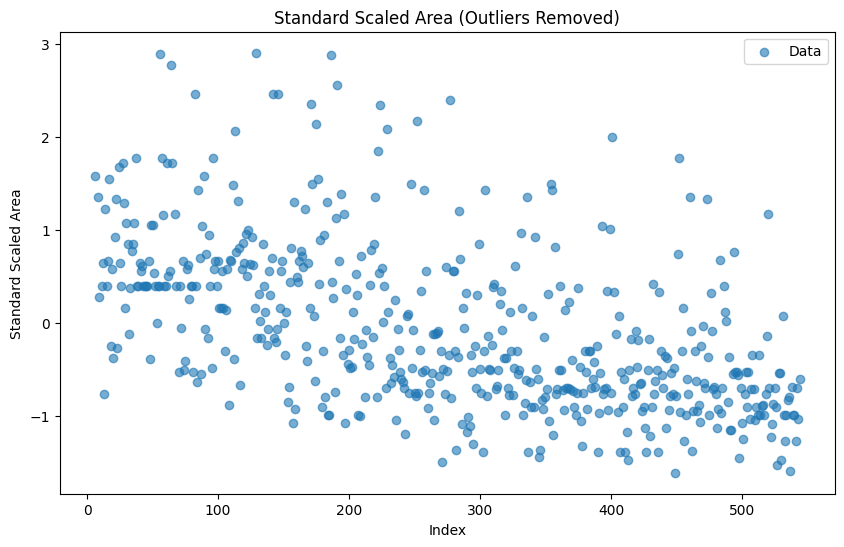

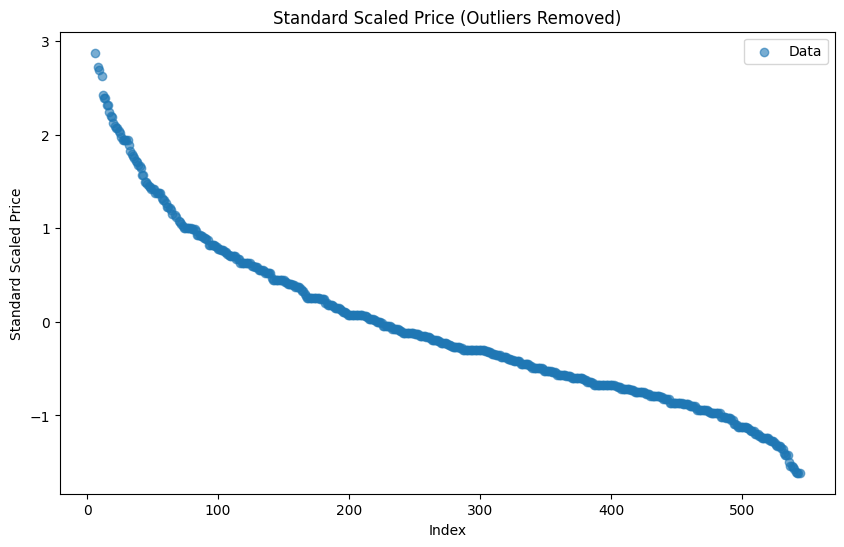

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of standard scaled 'area' in df3_cleaned
plt.figure(figsize=(8, 6))
sns.histplot(df3_cleaned['area'], kde=True)
plt.title('Distribution of Standard Scaled Area (df3_cleaned)')
plt.xlabel('Standard Scaled Area')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of standard scaled 'price' in df3_cleaned
plt.figure(figsize=(8, 6))
sns.histplot(df3_cleaned['price'], kde=True)
plt.title('Distribution of Standard Scaled Price (df3_cleaned)')
plt.xlabel('Standard Scaled Price')
plt.ylabel('Frequency')
plt.show()

# Plot 'area' vs index for df3_cleaned
plt.figure(figsize=(10, 6))
plt.scatter(df3_cleaned.index, df3_cleaned['area'], label='Data', alpha=0.6)
plt.title('Standard Scaled Area (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Standard Scaled Area')
plt.legend()
plt.show()

# Plot 'price' vs index for df3_cleaned
plt.figure(figsize=(10, 6))
plt.scatter(df3_cleaned.index, df3_cleaned['price'], label='Data', alpha=0.6)
plt.title('Standard Scaled Price (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Standard Scaled Price')
plt.legend()
plt.show()

In [77]:
def Linear_Regression(x, y, learning_rate=1e-4, iterations=1000):
    """A simple implementation of Linear Regression."""
    weights = np.zeros((1, x.shape[1]))
    bias = 0
    loss_history = []

    for _ in range(iterations):
        y_pred = np.dot(weights, x.T) + bias
        loss = np.mean((y - y_pred)**2)
        loss_history.append(loss)

        dw = (2/len(y)) * np.dot((y_pred - y), x)
        db = (2/len(y)) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, loss_history

In [79]:
# =============================================================================
# Data Preprocessing and Analysis
# =============================================================================

results = {}
iterations = 1000

# --- Analysis Setup ---
configurations = {
    'df2': {'scaling': min_max_scaling, 'encoding': 'label'},
    'df3': {'scaling': standard_scaling, 'encoding': 'label'},
    'df4': {'scaling': standard_scaling, 'encoding': 'one-hot'},
    'df5': {'scaling': min_max_scaling, 'encoding': 'one-hot'}
}

for name, config in configurations.items():
    print(f"\n{'='*50}\nAnalyzing {name}: {config['scaling'].__name__}, {config['encoding']} encoding\n{'='*50}")

    df = df_original.copy()

    # Apply Scaling
    df['price'] = config['scaling'](df, 'price')
    df['area'] = config['scaling'](df, 'area')

    # Apply Encoding
    categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    for col in categorical_cols:
        df[col] = df[col].map({'yes': 1, 'no': 0})

    if config['encoding'] == 'label':
        df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})
    else: # one-hot
        furnishing_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishing', drop_first=False).astype(int)
        df = pd.concat([df, furnishing_dummies], axis=1)
        df.drop('furnishingstatus', axis=1, inplace=True)

    # --- With Outliers ---
    x = np.array(df.drop('price', axis=1))
    y = np.array(df['price'])
    lr = 1e-3 if config['scaling'] == standard_scaling else 1e-4
    w, b, loss = Linear_Regression(x, y, learning_rate=lr, iterations=iterations)
    results[f'{name}_with_outliers'] = {'final_loss': loss[-1]}

    # --- Without Outliers ---
    df_cleaned = remove_outliers_z_score(df, ['price', 'area'])
    x_cleaned = np.array(df_cleaned.drop('price', axis=1))
    y_cleaned = np.array(df_cleaned['price'])
    w_c, b_c, loss_c = Linear_Regression(x_cleaned, y_cleaned, learning_rate=lr, iterations=iterations)
    results[f'{name}_without_outliers'] = {'final_loss': loss_c[-1]}

# =============================================================================
# Final Results and Conclusion
# =============================================================================

print(f"\n{'='*50}\nFinal Results Summary\n{'='*50}")

print("| DataFrame Configuration         | Outlier Status   | Final Loss (MSE) |")
print("|:--------------------------------|:-----------------|:----------------:|")
for case, result in results.items():
    name, status = case.split('_', 1)
    print(f"| {name:<31} | {status:<16} | {result['final_loss']:.6f}       |")

best_case = min(results, key=lambda x: results[x]['final_loss'])
print(f"\nBest performing case based on lowest loss is '{best_case}' with a final loss of {results[best_case]['final_loss']:.6f}.")


Analyzing df2: min_max_scaling, label encoding

Analyzing df3: standard_scaling, label encoding

Analyzing df4: standard_scaling, one-hot encoding

Analyzing df5: min_max_scaling, one-hot encoding

Final Results Summary
| DataFrame Configuration         | Outlier Status   | Final Loss (MSE) |
|:--------------------------------|:-----------------|:----------------:|
| df2                             | with_outliers    | 0.018473       |
| df2                             | without_outliers | 0.015157       |
| df3                             | with_outliers    | 0.430912       |
| df3                             | without_outliers | 0.364795       |
| df4                             | with_outliers    | 0.486179       |
| df4                             | without_outliers | 0.410469       |
| df5                             | with_outliers    | 0.016843       |
| df5                             | without_outliers | 0.013721       |

Best performing case based on lowest loss is 'df5_with

In [84]:
# Make predictions using the best performing model ('df5_without_outliers')
df5_cleaned = df_original.copy()
df5_cleaned['price'] = min_max_scaling(df5_cleaned, 'price')
df5_cleaned['area'] = min_max_scaling(df5_cleaned, 'area')
df5_cleaned['mainroad'] = df5_cleaned['mainroad'].map({'yes': 1, 'no': 0})
df5_cleaned['guestroom'] = df5_cleaned['guestroom'].map({'yes': 1, 'no': 0})
df5_cleaned['basement'] = df5_cleaned['basement'].map({'yes': 1, 'no': 0})
df5_cleaned['hotwaterheating'] = df5_cleaned['hotwaterheating'].map({'yes': 1, 'no': 0})
df5_cleaned['airconditioning'] = df5_cleaned['airconditioning'].map({'yes': 1, 'no': 0})
df5_cleaned['prefarea'] = df5_cleaned['prefarea'].map({'yes': 1, 'no': 0})
furnishing_dummies_cleaned = pd.get_dummies(df5_cleaned['furnishingstatus'], prefix='furnishing', drop_first=False).astype(int)
df5_cleaned = pd.concat([df5_cleaned, furnishing_dummies_cleaned], axis=1)
df5_cleaned.drop('furnishingstatus', axis=1, inplace=True)
df5_cleaned = remove_outliers_z_score(df5_cleaned, ['price', 'area'])


# Separate features (x) and target (y) for the best performing case
x_best = np.array(df5_cleaned.drop('price', axis=1))
y_best = np.array(df5_cleaned['price'])

# Use the learning rate determined for min_max_scaling (1e-4)
weights_best, bias_best, loss_history_best = Linear_Regression(x_best, y_best, learning_rate=1e-4, iterations=30000)

# Make predictions
y_pred_best = np.dot(weights_best, x_best.T) + bias_best

# Display the first 10 actual and predicted values
print("Actual vs Predicted Prices (first 10):")
for i in range(10):
    print(f"Actual: {y_best[i]:.4f}, Predicted: {y_pred_best[0][i]:.4f}")

Actual vs Predicted Prices (first 10):
Actual: 0.7273, Predicted: 0.5833
Actual: 0.7030, Predicted: 0.4518
Actual: 0.6970, Predicted: 0.4782
Actual: 0.6867, Predicted: 0.4587
Actual: 0.6545, Predicted: 0.4031
Actual: 0.6485, Predicted: 0.3428
Actual: 0.6485, Predicted: 0.3040
Actual: 0.6364, Predicted: 0.2956
Actual: 0.6364, Predicted: 0.4241
Actual: 0.6242, Predicted: 0.4810
